In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load a subset of data (e.g., first 10,000 rows) to reduce run time for testing
train_data = pd.read_csv("/content/drive/MyDrive/transaction_dataset/train.csv").sample(n=10000, random_state=42)
test_data = pd.read_csv("/content/drive/MyDrive/transaction_dataset/test.csv").sample(n=2000, random_state=42)

# Drop duplicates
train_data.drop_duplicates(keep="first", inplace=True)
test_data.drop_duplicates(keep="first", inplace=True)

# Define feature matrix and target variable
column_name = "target"
X = train_data.drop(columns=["ID_code", column_name])
y = train_data[column_name]

# Split data for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for certain models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Dictionary to store model accuracies
model_accuracies = {}

# Define a smaller set of models with reduced complexity
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Use scaled data where necessary
    if model_name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Display the best model based on accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest model: {best_model} with accuracy of {model_accuracies[best_model]:.4f}")

# Retrain the best model on full training data and make predictions on test data
final_model = models[best_model]
if best_model == "Logistic Regression":
    final_model.fit(scaler.fit_transform(X), y)
    y_test_pred = final_model.predict(scaler.transform(test_data.drop(columns="ID_code")))
else:
    final_model.fit(X, y)
    y_test_pred = final_model.predict(test_data.drop(columns="ID_code"))

# Display test predictions
print("Test Predictions:", y_test_pred)


Logistic Regression Accuracy: 0.9020
Decision Tree Accuracy: 0.8810
Random Forest Accuracy: 0.8995
Gradient Boosting Accuracy: 0.9020

Best model: Logistic Regression with accuracy of 0.9020
Test Predictions: [0 0 0 ... 0 0 0]


Logistic Regression - Accuracy: 0.9020, Precision: 0.5275, Recall: 0.2388, F1 Score: 0.3288, AUC-ROC: 0.8245
Decision Tree - Accuracy: 0.8810, Precision: 0.2771, Recall: 0.1144, F1 Score: 0.1620, AUC-ROC: 0.5853


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest - Accuracy: 0.8995, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, AUC-ROC: 0.7672
Gradient Boosting - Accuracy: 0.9020, Precision: 1.0000, Recall: 0.0249, F1 Score: 0.0485, AUC-ROC: 0.7996


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.8990, Precision: 0.4286, Recall: 0.0149, F1 Score: 0.0288, AUC-ROC: 0.7784

Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,AUC-ROC
Logistic Regression,0.9020,0.527473,0.238806,0.328767,0.824460
Decision Tree,0.8810,0.277108,0.114428,0.161972,0.585255
Random Forest,0.8995,0.000000,0.000000,0.000000,0.767156
Gradient Boosting,0.9020,1.000000,0.024876,0.048544,0.799569
XGBoost,0.8990,0.428571,0.014925,0.028846,0.778406


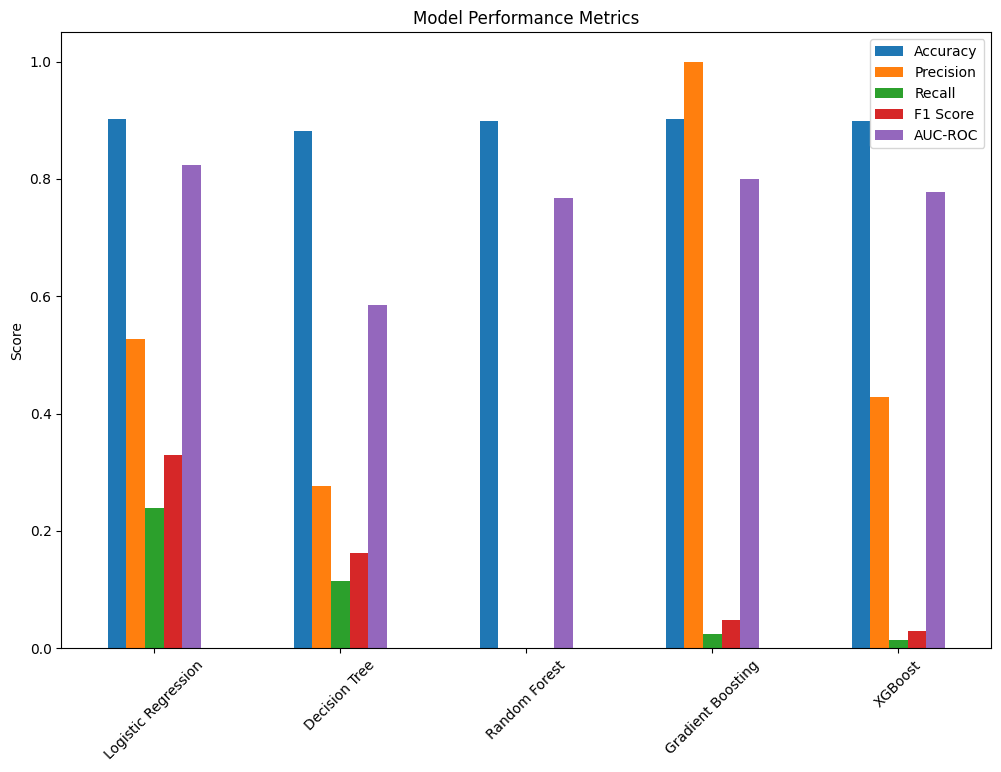

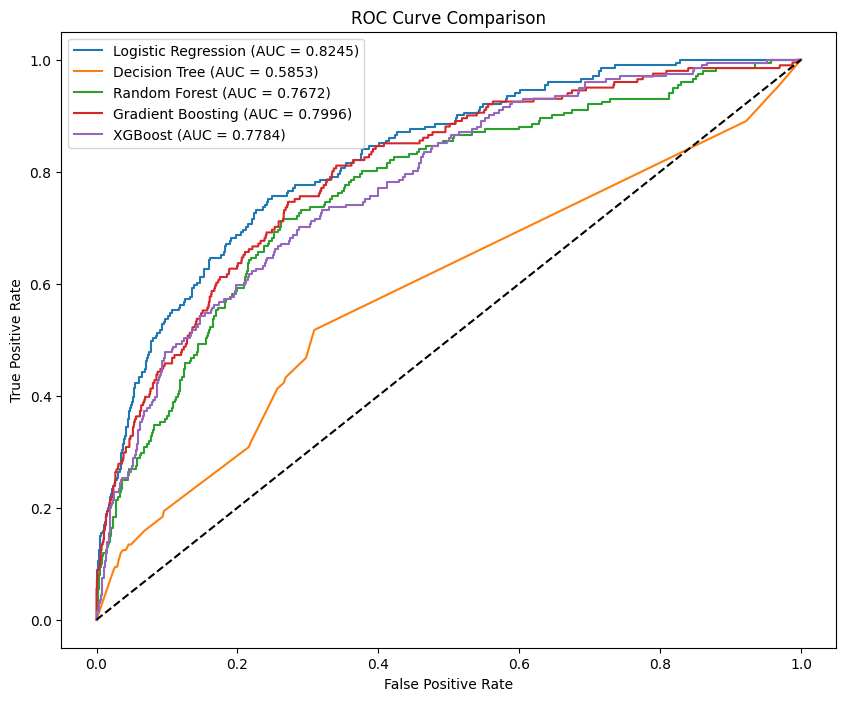


Best model based on AUC-ROC: Logistic Regression with AUC-ROC of 0.8245

Risk Segmentation on Test Data:
Low Risk       1864
Medium Risk     111
High Risk        25
Name: count, dtype: int64


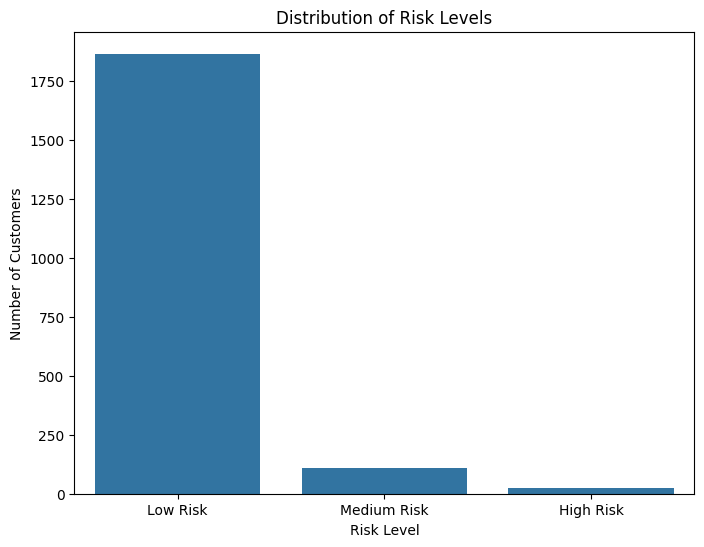

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Load a subset of data to reduce run time for testing
train_data = pd.read_csv("/content/drive/MyDrive/transaction_dataset/train.csv").sample(n=10000, random_state=42)
test_data = pd.read_csv("/content/drive/MyDrive/transaction_dataset/test.csv").sample(n=2000, random_state=42)

# Drop duplicates
train_data.drop_duplicates(keep="first", inplace=True)
test_data.drop_duplicates(keep="first", inplace=True)

# Define feature matrix and target variable
column_name = "target"
X = train_data.drop(columns=["ID_code", column_name])
y = train_data[column_name]

# Split data for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for certain models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Dictionary to store model metrics
model_metrics = {}

# Define models with an additional boosting method
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, max_depth=10, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for model_name, model in models.items():
    # Use scaled data where necessary
    if model_name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
        y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)

    # Store metrics
    model_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": roc_auc
    }
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, AUC-ROC: {roc_auc:.4f}")

# Display model performance comparison
metrics_df = pd.DataFrame(model_metrics).T
print("\nModel Performance Comparison:")
display(metrics_df)

# Plot comparison of metrics across models
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

# Plot ROC Curve for each model
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    if model_name == "Logistic Regression":
        y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_val)[:, 1]

    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc(fpr, tpr):.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Identify the best model based on AUC-ROC score
best_model_name = max(model_metrics, key=lambda x: model_metrics[x]['AUC-ROC'])
print(f"\nBest model based on AUC-ROC: {best_model_name} with AUC-ROC of {model_metrics[best_model_name]['AUC-ROC']:.4f}")

# Retrain the best model on full training data and make predictions on test data
final_model = models[best_model_name]
if best_model_name == "Logistic Regression":
    final_model.fit(scaler.fit_transform(X), y)
    y_test_proba = final_model.predict_proba(scaler.transform(test_data.drop(columns="ID_code")))[:, 1]
else:
    final_model.fit(X, y)
    y_test_proba = final_model.predict_proba(test_data.drop(columns="ID_code"))[:, 1]

# Categorize customers into risk levels based on predicted probabilities
risk_levels = pd.cut(
    y_test_proba,
    bins=[0, 0.33, 0.66, 1],
    labels=["Low Risk", "Medium Risk", "High Risk"]
)

# Display risk segmentation results
print("\nRisk Segmentation on Test Data:")
risk_counts = pd.Series(risk_levels).value_counts()
print(risk_counts)

# Plot risk level distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=risk_levels)
plt.title("Distribution of Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Number of Customers")
plt.show()

Linear Regression - MAE: 0.0000, MSE: 0.0000, R^2: 1.0000
Random Forest Regressor - MAE: 53.2140, MSE: 4506.8823, R^2: 0.3145

Model Performance Comparison:


,MAE,MSE,R^2
Linear Regression,5.354650e-13,4.558799e-25,1.000000
Random Forest Regressor,5.321402e+01,4.506882e+03,0.314517


Test Predictions (Revenue): [1315.7439 1358.453  1317.7974 ... 1397.1606 1458.7828 1452.7006]


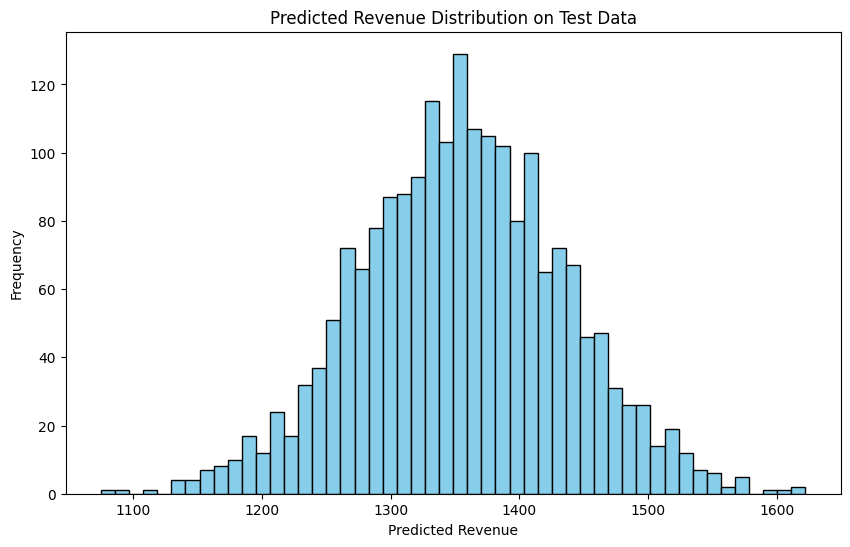

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load a subset of data to reduce run time for testing
train_data = pd.read_csv("/content/drive/MyDrive/transaction_dataset/train.csv").sample(n=10000, random_state=42)
test_data = pd.read_csv("/content/drive/MyDrive/transaction_dataset/test.csv").sample(n=2000, random_state=42)

# Drop duplicates
train_data.drop_duplicates(keep="first", inplace=True)
test_data.drop_duplicates(keep="first", inplace=True)

# Feature Engineering
# Simulate a revenue column based on existing features
train_data['revenue'] = train_data.iloc[:, 2:].sum(axis=1)  # Example: Simulating revenue
test_data['revenue'] = test_data.iloc[:, 2:].sum(axis=1)  # Example: Simulating revenue

# Define feature matrix and target variable for training
X_train = train_data.drop(columns=["ID_code", "target", "revenue"])  # Exclude 'target' and 'revenue' from training
y_train = train_data["revenue"]

# Split data for evaluation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Dictionary to store model metrics
model_metrics = {}

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_val)

    # Calculate metrics
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    # Store metrics
    model_metrics[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R^2": r2
    }
    print(f"{model_name} - MAE: {mae:.4f}, MSE: {mse:.4f}, R^2: {r2:.4f}")

# Display model performance comparison
metrics_df = pd.DataFrame(model_metrics).T
print("\nModel Performance Comparison:")
display(metrics_df)

# Identify the best model based on R^2 score
best_model_name = max(model_metrics, key=lambda x: model_metrics[x]['R^2'])  # Use R^2 for regression
final_model = models[best_model_name]

# Retrain the best model on full training data
final_model.fit(X_train, y_train)

# Prepare test data for prediction by dropping 'ID_code' and 'revenue'
X_test = test_data.drop(columns=["ID_code", "revenue"])  # Drop 'revenue' as it should not be in test data
y_test_pred = final_model.predict(X_test)

# Display test predictions
print("Test Predictions (Revenue):", y_test_pred)

# Optional: Visualize the predicted revenue
plt.figure(figsize=(10, 6))
plt.hist(y_test_pred, bins=50, color='skyblue', edgecolor='black')
plt.title("Predicted Revenue Distribution on Test Data")
plt.xlabel("Predicted Revenue")
plt.ylabel("Frequency")
plt.show()


In [ ]:
from xgboost import XGBClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:55:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Model Performance Comparison:
                     Accuracy  Precision  Recall  F1 Score  AUC-ROC
Logistic Regression    0.9020     0.5275  0.2388    0.3288   0.8245
Decision Tree          0.8810     0.2771  0.1144    0.1620   0.5853
Random Forest          0.8995     0.0000  0.0000    0.0000   0.7672
Gradient Boosting      0.9020     1.0000  0.0249    0.0485   0.7996
XGBoost                0.8990     0.4286  0.0149    0.0288   0.7784


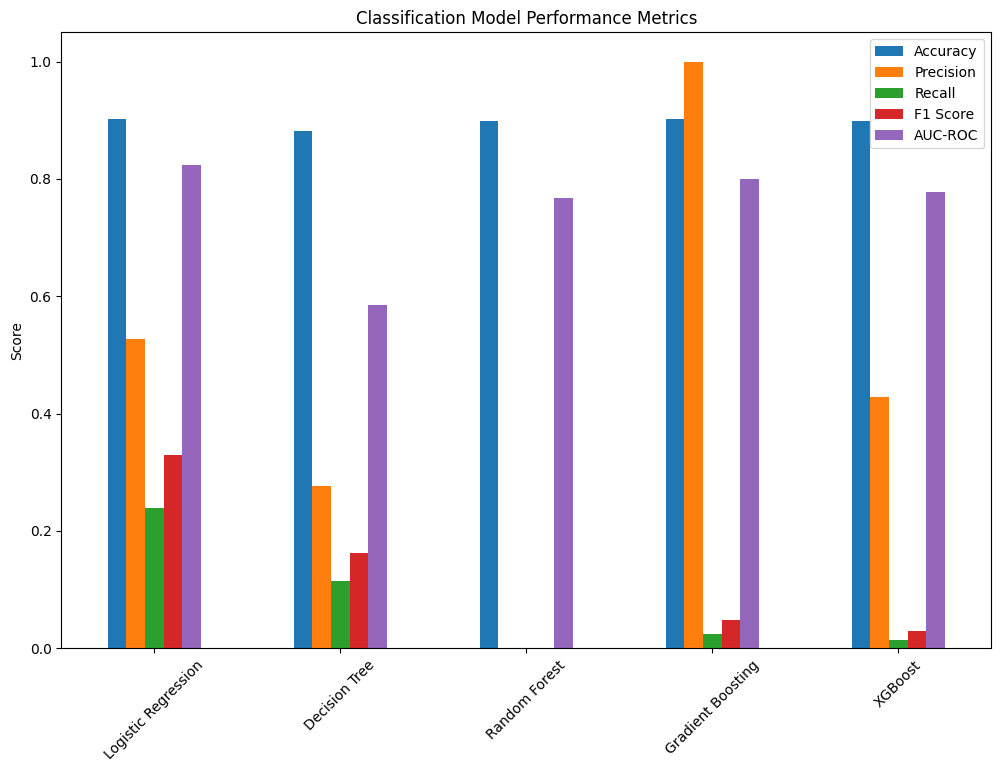


Best classification model based on AUC-ROC: Logistic Regression with AUC-ROC of 0.8245

Test Predictions (Classification):
[0 0 0 ... 0 0 0]

Regression Model Performance Comparison:
                            MAE        MSE     R^2
Linear Regression         0.000     0.0000  1.0000
Random Forest Regressor  53.214  4506.8823  0.3145

Test Predictions (Revenue):
[1315.7439 1358.453  1317.7974 ... 1397.1606 1458.7828 1452.7006]


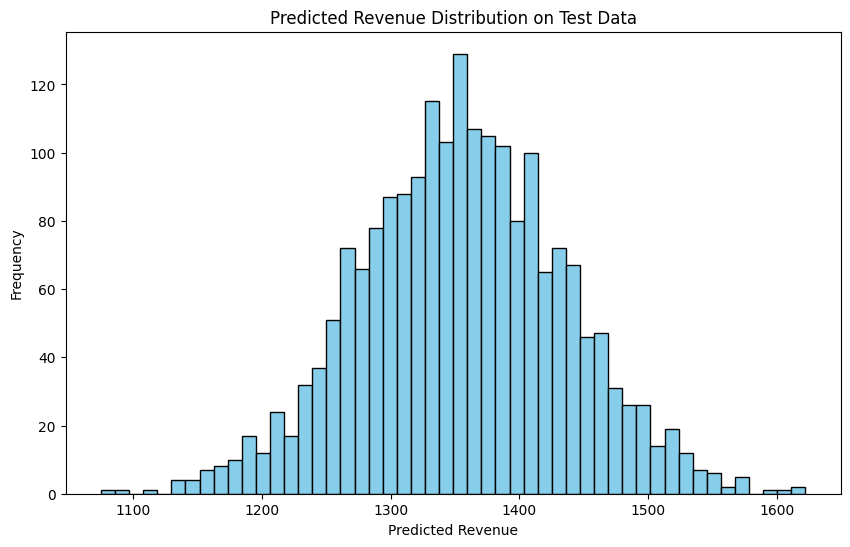

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, auc, mean_absolute_error,
                             mean_squared_error, r2_score)

# Load a subset of data to reduce run time for testing
train_data = pd.read_csv("/content/drive/MyDrive/transaction_dataset/train.csv").sample(n=10000, random_state=42)
test_data = pd.read_csv("/content/drive/MyDrive/transaction_dataset/test.csv").sample(n=2000, random_state=42)

# Drop duplicates
train_data.drop_duplicates(keep="first", inplace=True)
test_data.drop_duplicates(keep="first", inplace=True)

### Classification Task ###

# Define feature matrix and target variable for classification
column_name = "target"
X_class = train_data.drop(columns=["ID_code", column_name])
y_class = train_data[column_name]

# Split data for evaluation
X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Standardize features for certain models
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_val_class_scaled = scaler.transform(X_val_class)

# Dictionary to store model metrics for classification
classification_metrics = {}

# Define classification models
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, max_depth=10, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each classification model
for model_name, model in classification_models.items():
    if model_name == "Logistic Regression":
        model.fit(X_train_class_scaled, y_train_class)
        y_pred_class = model.predict(X_val_class_scaled)
        y_pred_proba_class = model.predict_proba(X_val_class_scaled)[:, 1]
    else:
        model.fit(X_train_class, y_train_class)
        y_pred_class = model.predict(X_val_class)
        y_pred_proba_class = model.predict_proba(X_val_class)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_val_class, y_pred_class)
    precision = precision_score(y_val_class, y_pred_class)
    recall = recall_score(y_val_class, y_pred_class)
    f1 = f1_score(y_val_class, y_pred_class)
    roc_auc = roc_auc_score(y_val_class, y_pred_proba_class)

    # Store metrics
    classification_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": roc_auc
    }

# Convert classification metrics to DataFrame for better display
classification_metrics_df = pd.DataFrame(classification_metrics).T
print("\nClassification Model Performance Comparison:")
print(classification_metrics_df.round(4))  # Round for better readability

# Plot comparison of metrics across classification models
classification_metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title("Classification Model Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

# Identify the best classification model based on AUC-ROC score
best_class_model_name = max(classification_metrics, key=lambda x: classification_metrics[x]['AUC-ROC'])
print(f"\nBest classification model based on AUC-ROC: {best_class_model_name} with AUC-ROC of {classification_metrics[best_class_model_name]['AUC-ROC']:.4f}")

# Retrain the best classification model on full training data and make predictions on test data
final_class_model = classification_models[best_class_model_name]
if best_class_model_name == "Logistic Regression":
    final_class_model.fit(scaler.fit_transform(X_class), y_class)
    y_test_pred_class = final_class_model.predict(scaler.transform(test_data.drop(columns="ID_code")))
else:
    final_class_model.fit(X_class, y_class)
    y_test_pred_class = final_class_model.predict(test_data.drop(columns="ID_code"))

# Display test predictions for classification
print("\nTest Predictions (Classification):")
print(y_test_pred_class)

### Regression Task ###

# Feature Engineering for regression
# Simulate a revenue column based on existing features
train_data['revenue'] = train_data.iloc[:, 2:].sum(axis=1)  # Example: Simulating revenue
test_data['revenue'] = test_data.iloc[:, 2:].sum(axis=1)  # Example: Simulating revenue

# Define feature matrix and target variable for regression
X_reg = train_data.drop(columns=["ID_code", "target", "revenue"])  # Exclude 'target' and 'revenue' from training
y_reg = train_data["revenue"]

# Split data for evaluation
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Dictionary to store model metrics for regression
regression_metrics = {}

# Define regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each regression model
for model_name, model in regression_models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred_reg = model.predict(X_val_reg)

    # Calculate metrics
    mae = mean_absolute_error(y_val_reg, y_pred_reg)
    mse = mean_squared_error(y_val_reg, y_pred_reg)
    r2 = r2_score(y_val_reg, y_pred_reg)

    # Store metrics
    regression_metrics[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R^2": r2
    }

# Convert regression metrics to DataFrame for better display
regression_metrics_df = pd.DataFrame(regression_metrics).T
print("\nRegression Model Performance Comparison:")
print(regression_metrics_df.round(4))  # Round for better readability

# Identify the best model based on R^2 score
best_reg_model_name = max(regression_metrics, key=lambda x: regression_metrics[x]['R^2'])
final_reg_model = regression_models[best_reg_model_name]

# Retrain the best regression model on full training data
final_reg_model.fit(X_reg, y_reg)

# Prepare test data for prediction
X_test_reg = test_data.drop(columns=["ID_code", "revenue"])  # Drop 'revenue' as it should not be in test data
y_test_pred_reg = final_reg_model.predict(X_test_reg)

# Display test predictions for regression
print("\nTest Predictions (Revenue):")
print(y_test_pred_reg)

# Optional: Visualize the predicted revenue distribution
plt.figure(figsize=(10, 6))
plt.hist(y_test_pred_reg, bins=50, color='skyblue', edgecolor='black')
plt.title("Predicted Revenue Distribution on Test Data")
plt.xlabel("Predicted Revenue")
plt.ylabel("Frequency")
plt.show()


Logistic Regression - Accuracy: 0.9020, Precision: 0.5275, Recall: 0.2388, F1 Score: 0.3288, AUC-ROC: 0.8245
Decision Tree - Accuracy: 0.8810, Precision: 0.2771, Recall: 0.1144, F1 Score: 0.1620, AUC-ROC: 0.5853


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest - Accuracy: 0.8995, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, AUC-ROC: 0.7672
Gradient Boosting - Accuracy: 0.9020, Precision: 1.0000, Recall: 0.0249, F1 Score: 0.0485, AUC-ROC: 0.7996


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:05:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.8990, Precision: 0.4286, Recall: 0.0149, F1 Score: 0.0288, AUC-ROC: 0.7784

Classification Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,AUC-ROC
Logistic Regression,0.9020,0.527473,0.238806,0.328767,0.824460
Decision Tree,0.8810,0.277108,0.114428,0.161972,0.585255
Random Forest,0.8995,0.000000,0.000000,0.000000,0.767156
Gradient Boosting,0.9020,1.000000,0.024876,0.048544,0.799569
XGBoost,0.8990,0.428571,0.014925,0.028846,0.778406



Best classification model based on AUC-ROC: Logistic Regression with AUC-ROC of 0.8245
Test Predictions (Classification): [0 0 0 ... 0 0 0]
Linear Regression - MAE: 0.0000, MSE: 0.0000, R^2: 1.0000
Random Forest Regressor - MAE: 53.2140, MSE: 4506.8823, R^2: 0.3145

Regression Model Performance Comparison:


,MAE,MSE,R^2
Linear Regression,5.354650e-13,4.558799e-25,1.000000
Random Forest Regressor,5.321402e+01,4.506882e+03,0.314517


Test Predictions (Revenue): [1315.7439 1358.453  1317.7974 ... 1397.1606 1458.7828 1452.7006]


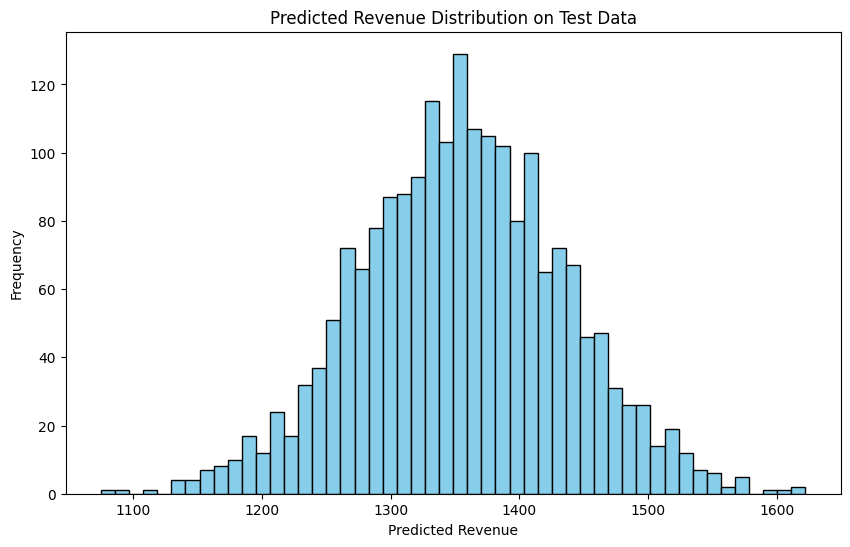

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, auc, mean_absolute_error,
                             mean_squared_error, r2_score)

# Load data
train_data = pd.read_csv("/content/drive/MyDrive/transaction_dataset/train.csv").sample(n=10000, random_state=42)
test_data = pd.read_csv("/content/drive/MyDrive/transaction_dataset/test.csv").sample(n=2000, random_state=42)

# Drop duplicates
train_data.drop_duplicates(keep="first", inplace=True)
test_data.drop_duplicates(keep="first", inplace=True)

### Customer Risk Profiling and Segmentation ###

# Define feature matrix and target variable for classification
classification_column = "target"
X_class = train_data.drop(columns=["ID_code", classification_column])
y_class = train_data[classification_column]

# Split data for evaluation
X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Standardize features for certain models
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_val_class_scaled = scaler.transform(X_val_class)

# Dictionary to store model metrics for classification
classification_metrics = {}

# Define classification models
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, max_depth=10, random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each classification model
for model_name, model in classification_models.items():
    if model_name == "Logistic Regression":
        model.fit(X_train_class_scaled, y_train_class)
        y_pred_class = model.predict(X_val_class_scaled)
        y_pred_proba_class = model.predict_proba(X_val_class_scaled)[:, 1]
    else:
        model.fit(X_train_class, y_train_class)
        y_pred_class = model.predict(X_val_class)
        y_pred_proba_class = model.predict_proba(X_val_class)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_val_class, y_pred_class)
    precision = precision_score(y_val_class, y_pred_class)
    recall = recall_score(y_val_class, y_pred_class)
    f1 = f1_score(y_val_class, y_pred_class)
    roc_auc = roc_auc_score(y_val_class, y_pred_proba_class)

    # Store metrics
    classification_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": roc_auc
    }
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, AUC-ROC: {roc_auc:.4f}")

# Display model performance comparison for classification
classification_metrics_df = pd.DataFrame(classification_metrics).T
print("\nClassification Model Performance Comparison:")
display(classification_metrics_df)

# Identify the best classification model based on AUC-ROC score
best_class_model_name = max(classification_metrics, key=lambda x: classification_metrics[x]['AUC-ROC'])
print(f"\nBest classification model based on AUC-ROC: {best_class_model_name} with AUC-ROC of {classification_metrics[best_class_model_name]['AUC-ROC']:.4f}")

# Retrain the best classification model on full training data and make predictions on test data
final_class_model = classification_models[best_class_model_name]
if best_class_model_name == "Logistic Regression":
    final_class_model.fit(scaler.fit_transform(X_class), y_class)
    y_test_pred_class = final_class_model.predict(scaler.transform(test_data.drop(columns="ID_code")))
else:
    final_class_model.fit(X_class, y_class)
    y_test_pred_class = final_class_model.predict(test_data.drop(columns="ID_code"))

# Display test predictions for classification
print("Test Predictions (Classification):", y_test_pred_class)

### Revenue Forecasting Based on Transaction Patterns ###

# Feature Engineering for regression
# Simulate a revenue column based on existing features
train_data['revenue'] = train_data.iloc[:, 2:].sum(axis=1)  # Example: Simulating revenue
test_data['revenue'] = test_data.iloc[:, 2:].sum(axis=1)  # Example: Simulating revenue

# Define feature matrix and target variable for regression
X_reg = train_data.drop(columns=["ID_code", "target", "revenue"])  # Exclude 'target' and 'revenue' from training
y_reg = train_data["revenue"]

# Split data for evaluation
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Dictionary to store model metrics for regression
regression_metrics = {}

# Define regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each regression model
for model_name, model in regression_models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred_reg = model.predict(X_val_reg)

    # Calculate metrics
    mae = mean_absolute_error(y_val_reg, y_pred_reg)
    mse = mean_squared_error(y_val_reg, y_pred_reg)
    r2 = r2_score(y_val_reg, y_pred_reg)

    # Store metrics
    regression_metrics[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R^2": r2
    }
    print(f"{model_name} - MAE: {mae:.4f}, MSE: {mse:.4f}, R^2: {r2:.4f}")

# Display model performance comparison for regression
regression_metrics_df = pd.DataFrame(regression_metrics).T
print("\nRegression Model Performance Comparison:")
display(regression_metrics_df)

# Identify the best model based on R^2 score
best_reg_model_name = max(regression_metrics, key=lambda x: regression_metrics[x]['R^2'])
final_reg_model = regression_models[best_reg_model_name]

# Retrain the best regression model on full training data
final_reg_model.fit(X_reg, y_reg)

# Prepare test data for prediction
X_test_reg = test_data.drop(columns=["ID_code", "revenue"])  # Drop 'revenue' as it should not be in test data
y_test_pred_reg = final_reg_model.predict(X_test_reg)

# Display test predictions for regression
print("Test Predictions (Revenue):", y_test_pred_reg)

# Optional: Visualize the predicted revenue distribution
plt.figure(figsize=(10, 6))
plt.hist(y_test_pred_reg, bins=50, color='skyblue', edgecolor='black')
plt.title("Predicted Revenue Distribution on Test Data")
plt.xlabel("Predicted Revenue")
plt.ylabel("Frequency")
plt.show()


In [ ]:
!pip install lightgbm
